# Integral de convolución en sistemas lineales.

Para un sistema lineal e invariante en el tiempo, la operación de convolución permite el cálculo de la salida, como la respuesta a una señal arbitraria de estímulo $x(t)$, en términos de su respuesta al impulso $h(t)$, por medio de la integral de convolución definida como:

```{math}
:label: convolucion
\begin{equation}
  y(t)=\int^{\infty}_{-\infty}x(\tau)h(t-\tau)d\tau
	\end{equation}
```

La ecuación {eq}`convolucion` se conoce como la integral de convolución para sistemas de tiempo continuo ({cite:t}`Alkin`). Se dice entonces, que la señal de salida $y(t)$ de un sistema se obtiene aplicando la convolución de la señal de entrada o estímulo $x(t)$ con la respuesta al impulso $h(t)$ del sistema. La convolución se representa por medio del operador $*$, el cual se denomina el operador convolución.


```{math}
:label: convolucion_operador
\begin{equation}
  y(t)=x(t)*h(t)=\int^{\infty}_{-\infty}x(\tau)h(t-\tau)d\tau
	\end{equation}
```

```{admonition} Convolución de sistemas de tiempo contínuo:
El operador convolución de la señal de entrada $x(t)$ y la respuesta al impulso de un sistema $h(t)$ proporciona la salida $y(t)$ del sistema como:

```{math}
:label: convolucion_conmuta
\begin{eqnarray}
  y(t)=x(t)*h(t)=\int^{\infty}_{-\infty}x(\tau)h(t-\tau)d\tau\\
  y(t)=h(t)*x(t)=\int^{\infty}_{-\infty}h(\tau)x(t-\tau)d\tau\\
	\end{eqnarray}
```
La operación de convolución es conmutativa. A continuación se muestra de forma gráfica la operación de convoución para determinar la respuesta de los sistemas, usando la respuesta al impulso.

1. Primero, dibuje la señal $x(\lambda)$, $\lambda$ será considerada como una nueva variable independiente. como se muestra abajo:


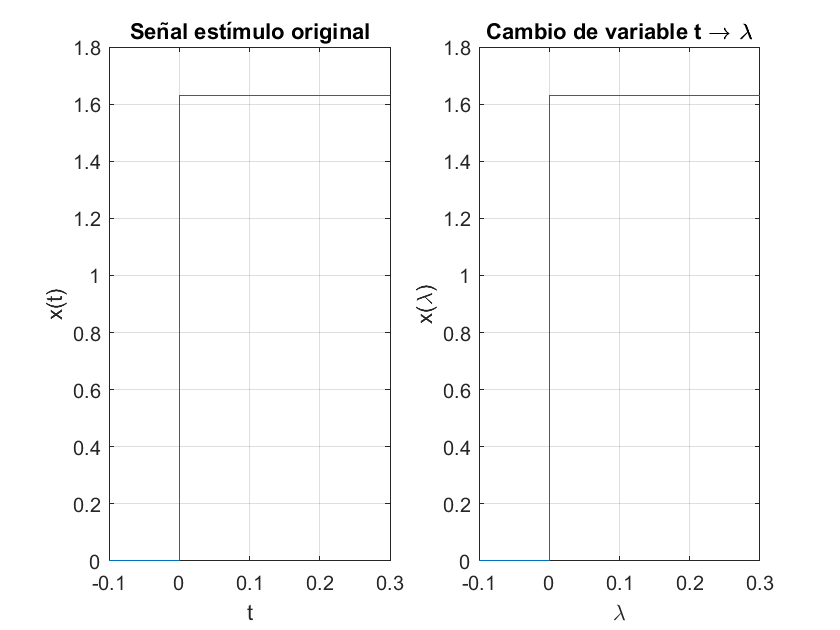

In [1]:
clear
close all
clc

t=[-0.1:0.0001:0.3];
%xt= @(x) sin(11.5*x).*exp(-3*x);
xt= @(x) 1.63*(x>=0);

subplot(1,2,1)
plot(t,xt(t))
xlabel("t")
ylabel("x(t)")
title("Señal estímulo original")
set(gca,'fontsize',10);
grid on

subplot(1,2,2)
plot(t,xt(t))
xlabel("\lambda")
ylabel("x(\lambda)")
title("Cambio de variable t \rightarrow \lambda")
set(gca,'fontsize',10);
grid on

2. Después, para un valor en específico de la variable independiente $t$, dibuje la gráfica de la señal $h(t-\lambda)$. Esta tarea se llevará a cabo en dos pasos principales:

a. Dibuje $h(-\lambda)$. Esto significa hacer la operación de reversión en el tiempo. 
b. En $h(\lambda)$, sustitúyase $\lambda \rightarrow | \lambda-t$. Esto significa un desplazaemiento en el tiempo de la función $h(-\lambda)$ en $t$ unidades. 

El siguiente código muestra la gráfica de lo anteriormente expuesto:

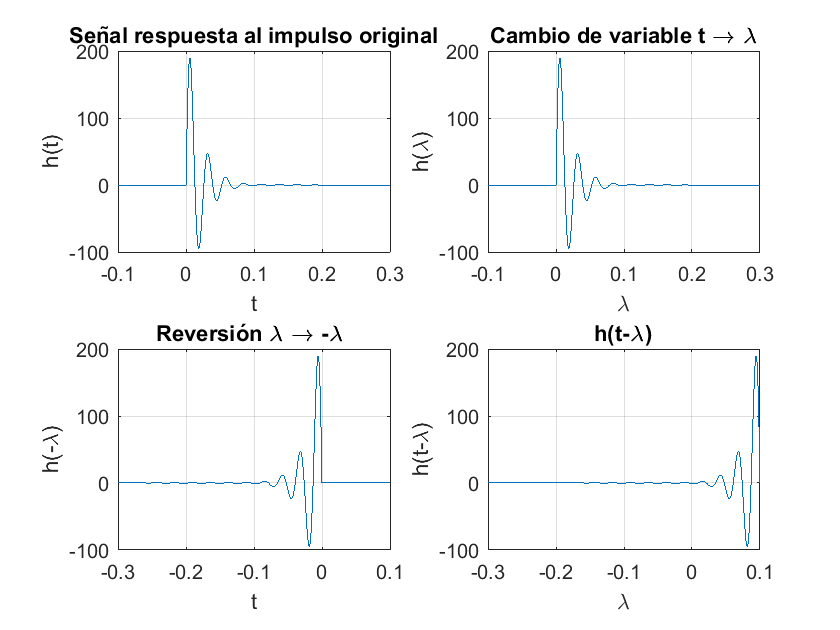

In [2]:
close all
ht=@(x) (x>=0).*(261.7287*sin(239.58*x)).*exp(-52.98*x);

subplot(2,2,1)
plot(t,ht(t))
xlabel("t")
ylabel("h(t)")
title("Señal respuesta al impulso original")
set(gca,'fontsize',10);
grid on

subplot(2,2,2)
plot(t,ht(t))
xlabel("\lambda")
ylabel("h(\lambda)")
title("Cambio de variable t \rightarrow \lambda")
set(gca,'fontsize',10);
grid on

subplot(2,2,3)
plot(-t,ht(t))
xlabel("t")
ylabel("h(-\lambda)")
title("Reversión \lambda \rightarrow -\lambda ")
set(gca,'fontsize',10);
grid on

t2=[-0.1:0.0001:0.3];
subplot(2,2,4)
plot(-t,(-t<=0.1).*ht(t+0.1))
xlabel("\lambda")
ylabel("h(t-\lambda)")
title("h(t-\lambda)")
set(gca,'fontsize',10);
grid on

3. Multiplicar las dos señales esbozadas en los pasos 1 y 2 para obtener el producto:

$$
f(\lambda)=x(\lambda)h(t-\lambda)
$$

4. Calcular el area bajo la curva formada por el producto $f(\lambda)=x(\lambda)h(t-\lambda)$, por medio de la integral respecto de la variable independiente $\lambda$. El resultado es el valor de la señal en el instante de tiempo específico $t$. 

5. Repita los pasos 1 al 4 para todos los valores de $t$ que son de interés.


Usando la respuesta al impulso $h(t)$ del sistema RLC como se expresa en la ecuación {eq}`h_RLC_final` y la instrucción `cumtrapz()` que permite el cálculo de la respuesta al impulso se puede graficar la respuesta al est $x(t)=1.63u(t)$

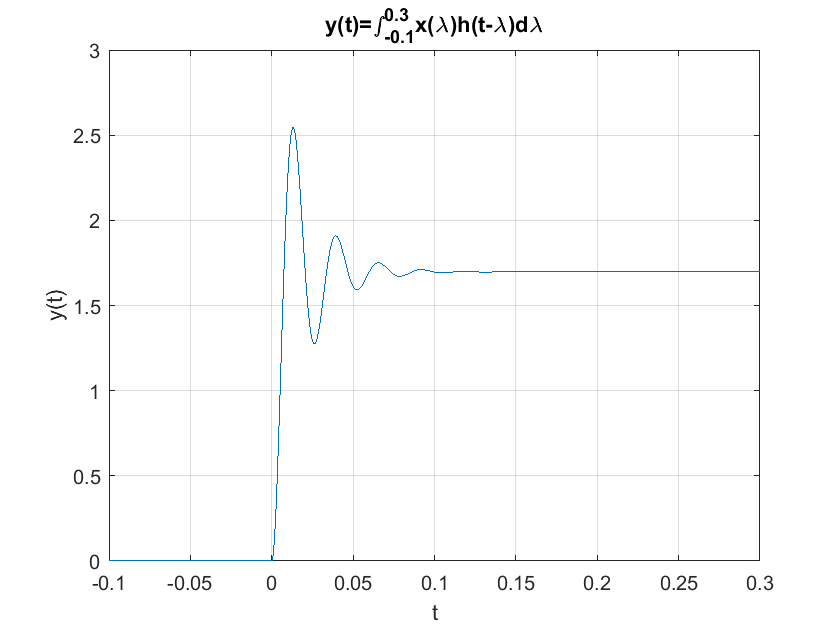

In [3]:
figure
plot(t,0.0001*cumtrapz((t>=0).*ht(t).*xt(t)))
xlabel("t")
ylabel("y(t)")
title("y(t)=\int^{0.3}_{-0.1}x(\lambda)h(t-\lambda)d\lambda")
set(gca,'fontsize',10);
grid on